<a href="https://colab.research.google.com/github/123972/Deep-Learning-Final-Project/blob/master/Copia_de_1_EDA_y_Preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final de Deep Learning
1.   Angel Rafael Ortega Ramírez 	123972
2.   Carlos Tabares Juárez Bernal 	141507
1.   Mario Rodríguez Arias	164471

---

## 1.- Importación de los Datos

In [0]:
import os
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from collections import Counter 
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from keras.preprocessing.image import load_img, img_to_array
from skimage.io import imread, imsave
from skimage.transform import rescale
from skimage import img_as_ubyte
import pickle

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Using TensorFlow backend.


In [0]:
#Montamos nuestro Google Drive respectivo para almacenar las imágenes normalizadas
from google.colab import drive
drive.mount('/content/gdrive') #Se da click en el URL que aparece y se ingresa la clave de autorización

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!mkdir '/content/gdrive/My Drive/Proyecto_Final_DL/' #Se crea la carpeta Proyecto_Final_DL en la primer ejecución
os.chdir('/content/gdrive/My Drive/Proyecto_Final_DL')
print("Directorio del Proyecto Final" , os.getcwd())

mkdir: cannot create directory ‘/content/gdrive/My Drive/Proyecto_Final_DL/’: File exists
Directorio del Proyecto Final /content/gdrive/My Drive/Proyecto_Final_DL


In [0]:
# Descargamos los archivos a utilizar en el proyecto
!wget 'https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_Dataset.zip'
!wget 'https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_text.zip'

!unzip Flickr8k_Dataset.zip
!unzip Flickr8k_text.zip

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: Flicker8k_Dataset/3429465163_fb8ac7ce7f.jpg  
  inflating: __MACOSX/Flicker8k_Dataset/._3429465163_fb8ac7ce7f.jpg  
  inflating: Flicker8k_Dataset/3429581486_4556471d1a.jpg  
  inflating: __MACOSX/Flicker8k_Dataset/._3429581486_4556471d1a.jpg  
  inflating: Flicker8k_Dataset/3429641260_2f035c1813.jpg  
  inflating: __MACOSX/Flicker8k_Dataset/._3429641260_2f035c1813.jpg  
  inflating: Flicker8k_Dataset/3429956016_3c7e3096c2.jpg  
  inflating: __MACOSX/Flicker8k_Dataset/._3429956016_3c7e3096c2.jpg  
  inflating: Flicker8k_Dataset/3430100177_5864bf1e73.jpg  
  inflating: __MACOSX/Flicker8k_Dataset/._3430100177_5864bf1e73.jpg  
  inflating: Flicker8k_Dataset/3430287726_94a1825bbf.jpg  
  inflating: __MACOSX/Flicker8k_Dataset/._3430287726_94a1825bbf.jpg  
  inflating: Flicker8k_Dataset/3430526230_234b3550f6.jpg  
  inflating: __MACOSX/Flicker8k_Dataset/._3430526230_234b3550f6.jpg  
  inflating: Flicker8k_Dataset

## 2.- Análisis Exploratorio de los Datos

El de datos contiene dos archivos:

**Flickr8k_Dataset:** Contiene un total de 8091 imágenes en formato JPEG de diferentes formas y tamaños. En él ya están definidas 6000 para entrenamiento, 1000 para prueba y 1000 para validación.

**Flickr8k_text:** Contiene los archivos con los "captions" o descripciones de cada imagen. Para cada imagen existen 5 descripciones dando un total de 40,460 descripciones.

1. Flickr8k.token.txt - Listado sin modificaciones de las descripciones de las imágenes, el formato del archivo es "image address # caption number"

2. Flickr8k.lemma.txt - La versión lematizada del archivo anterior (es decir, sin plurales, conjugaciones, géneros, etc)
3. Flickr_8k.trainImages.txt - Las imágenes definidas como de entrenamiento
4. Flickr_8k.devImages.txt - Las imágenes de desarrollo o validación
5. Flickr_8k.testImages.txt - Imágenes de prueba

In [0]:
# Ubicación del set de imágenes
Flickr_images_dir = "Flicker8k_Dataset/"
# Archivo de descripciones sin lematización
Flickr_text = "Flickr8k.token.txt"

imagenes = os.listdir(Flickr_images_dir)
print("Número total de imágenes en el set Flicker8k:")
len(imagenes)

Número total de imágenes en el set Flicker8k:


8091

Análisis de las 40,460 descripciones y términos más utilizados.

In [0]:
## read in the Flickr caption data

file = open(Flickr_text,'r')
text = file.read()
file.close()


datatxt = []
for line in text.split('\n'):
    col = line.split('\t')
    if len(col) == 1:
        continue
    w = col[0].split("#")
    datatxt.append(w + [col[1].lower()])

df_txt = pd.DataFrame(datatxt,columns=["filename","index","caption"])
df_txt = df_txt.sample(frac=1)
df_txt

,filename,index,caption
1369,1304961697_76b86b0c18.jpg,4,two young kids wakeboarding with one hand each...
12168,2613920405_e91e6ebd7a.jpg,3,a man walks with a cow down a dirt sidewalk .
15928,2868136205_3cf679208d.jpg,3,"child riding wheeled , yellow toy , with adult..."
23729,3257103624_e76f25ff9e.jpg,4,two men walk through the water .
669,1142283988_6b227c5231.jpg,4,two people are hugging and one is wearing a pi...
...,...,...,...
27272,3403370354_5d266873b4.jpg,2,a man is flailing in water while holding up a ...
39122,661546153_9d30db6984.jpg,2,a baby playing in a toy
2372,1446933195_8fe9725d62.jpg,2,a puppy dog is playing with a branch .
13976,2734669176_c272b42597.jpg,1,a blonde haired girl is doing a trick with her...


Text(0.5, 1.0, 'Top 20 frecuencia de palabras (Removiendo stopwords)')

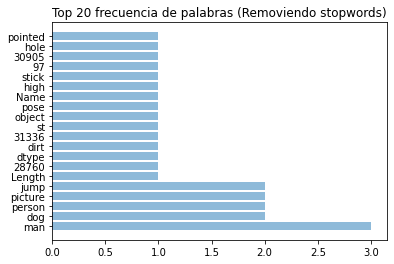

In [0]:

tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english')) 
word_tokens = tokenizer.tokenize(str(df_txt.caption))
  
filtered_sentence = [w for w in word_tokens if not w in stop_words] 
filtered_sentence = [] 
  
for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence.append(w) 
  
dfw=pd.DataFrame(filtered_sentence)
df_stack=dfw.stack(level=0) 
counter=df_stack.value_counts()[0:20]
plt.barh(counter.index, counter.values, align='center', alpha=0.5)
plt.title('Top 20 frecuencia de palabras (Removiendo stopwords)')

Ejemplos de descripciones con su respectiva imagen

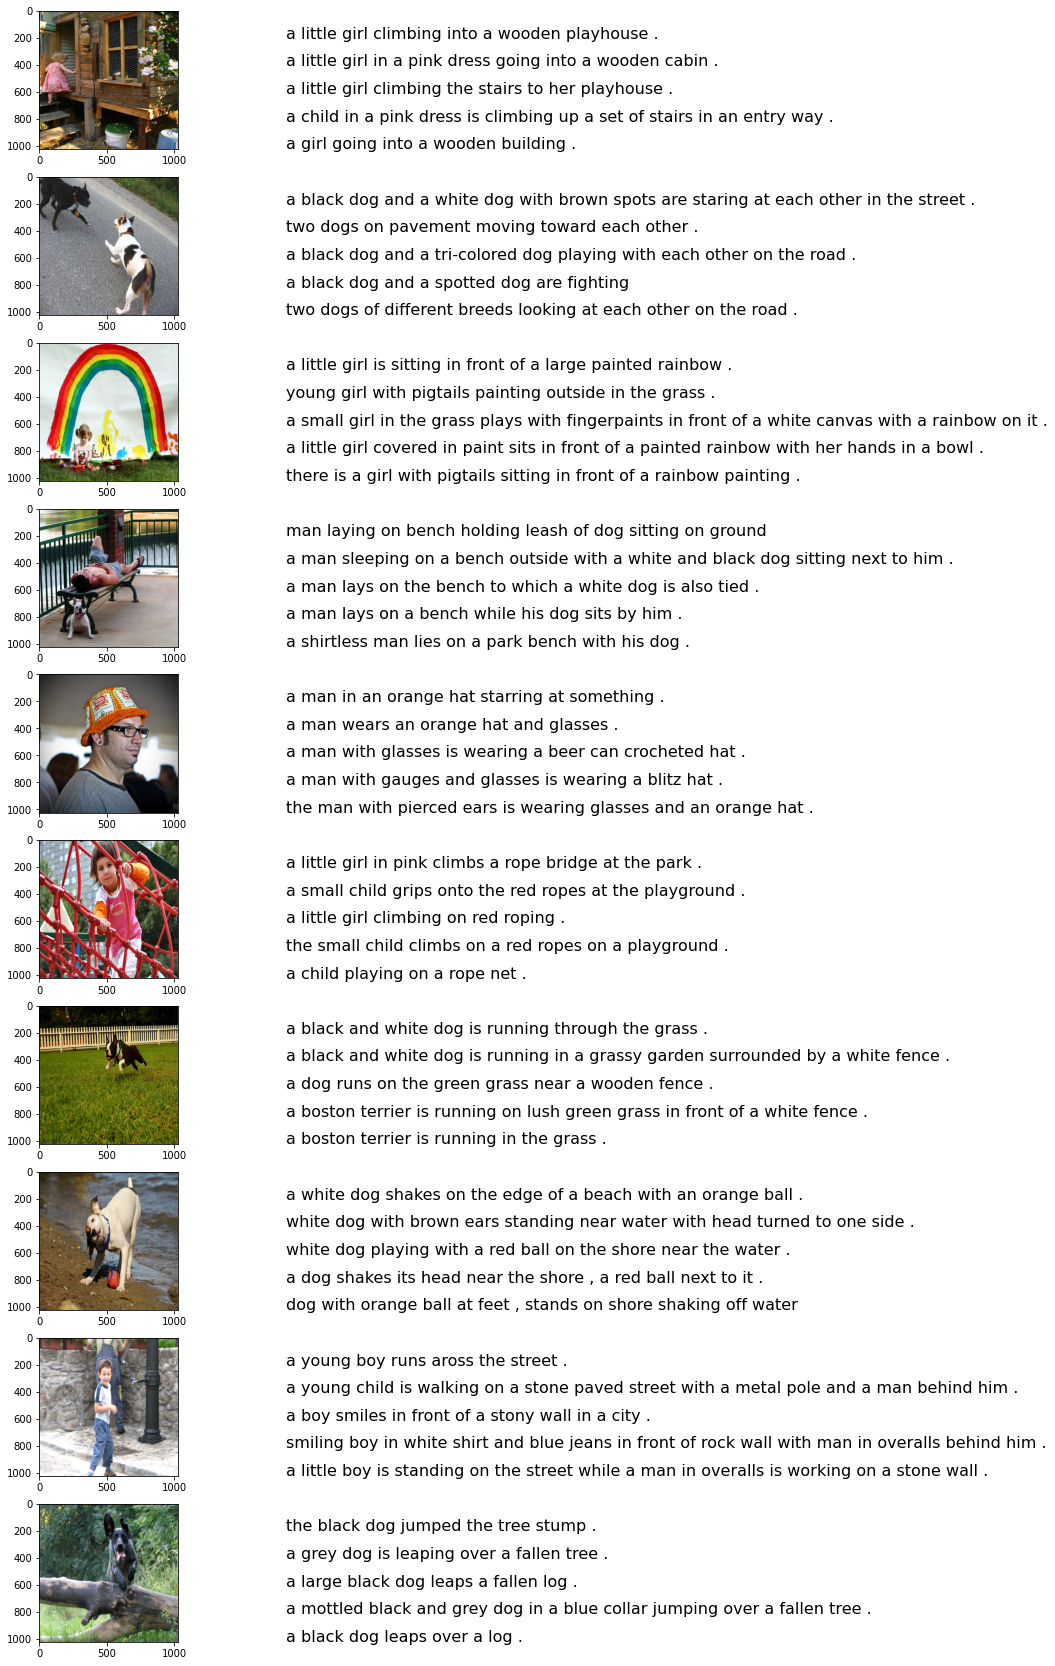

In [0]:
uni_filenames = np.unique(df_txt.filename.values)
npic = 10
npix = 1024
target_size = (npix,npix,3)

count = 1
fig = plt.figure(figsize=(10,30))
for imagen in uni_filenames[:npic]:
    filename = Flickr_images_dir + '/' + imagen
    captions = list(df_txt["caption"].loc[df_txt["filename"]==imagen].values)
    image_load = load_img(filename, target_size=target_size)
    
    ax = fig.add_subplot(npic,2,count)
    ax.imshow(image_load)
    count += 1
    
    ax = fig.add_subplot(npic,2,count)
    plt.axis('off')
    ax.plot()
    ax.set_xlim(0,1)
    ax.set_ylim(0,len(captions))
    for i, caption in enumerate(captions):
        ax.text(0,i,caption,fontsize=16)
    count += 1

##3.- Preprocesamiento de los datos

In [0]:
# Frame loaded image within a square generic image
def margin_img(I):
    H, W = I.shape[0], I.shape[1]
    r = 256 / np.max([H, W])
    I = rescale(I, (r, r, 1))
    O = np.zeros((256, 256, 3)) #Se sugiere que se reescalen a 64x64 pixeles (Stage I3). Stage II = 256x256 pixeles.

    H, W = I.shape[0], I.shape[1]
    margin = np.round(np.abs(H-W) / 2).astype('int')
    if H > W:
        O[:, margin:margin+W, :] = I
    else:
        O[margin:margin+H, :, :] = I
        
    return img_as_ubyte(O)

In [0]:
df = pd.read_csv("Flickr8k.token.txt", sep='\t', names=['ID', 'Text'], index_col=False)
print(df.shape)

# Remueve entradas con valores de NaN
df.dropna(inplace=True)
df.isnull().values.any()
df

(40460, 2)


,ID,Text
0,1000268201_693b08cb0e.jpg#0,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg#1,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg#2,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg#3,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg#4,A little girl in a pink dress going into a woo...
...,...,...
40455,997722733_0cb5439472.jpg#0,A man in a pink shirt climbs a rock face
40456,997722733_0cb5439472.jpg#1,A man is rock climbing high in the air .
40457,997722733_0cb5439472.jpg#2,A person in a red shirt climbing up a rock fac...
40458,997722733_0cb5439472.jpg#3,A rock climber in a red shirt .


In [0]:
# Load image
def load_image(img_id):
    I = imread('Flicker8k_Dataset/' + img_id) #lector de imágenes
    I = margin_img(I) #reescalamiento
    return I

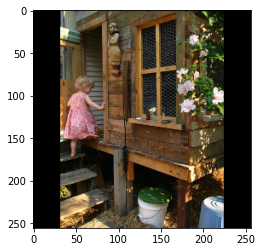

In [0]:
# Se observa un ejemplo con el reescalamiento
!mkdir Normalized_images #Creamos el directorio en nuestro google drive
I = load_image(df['ID'][0][:-2])
plt.imshow(I)
imsave('Normalized_images/' + df['ID'][0][:-6] + '_' + df['ID'][0][-1] + '.jpg', I)

In [0]:
# Carga las imágenes, las reescala y las guarda. Mantiene registro de las encontradas y no encontradas.
# Se tarda cerca de 20 minutos.
found_y = []
found_n = []

for index, row in df.iterrows():
    try:
        img = load_image(row['ID'][:-2])
        new_name = row['ID'][:-6] + '_' + row['ID'][-1] + '.jpg'
        imsave('Normalized_images/' + new_name, img)
        found_y.append(row['ID'])
    except:
        found_n.append(row['ID'])

In [0]:
# Algunas ligas para documentación.
#
# GAN paper por Goodfellow: https://arxiv.org/abs/1406.2661
# Goodfellow's tutorial: https://arxiv.org/abs/1701.00160
# Tutorial en tf (DCGAN): https://www.tensorflow.org/tutorials/generative/dcgan
# Tips by Goodfellow et al., http://papers.nips.cc/paper/6125-improved-techniques-for-training-gans.pdf
#
# Otros recursos
# https://www.youtube.com/watch?v=RRTuumxm3CE
# https://machinelearningmastery.com/how-to-train-stable-generative-adversarial-networks/
# https://towardsdatascience.com/writing-your-first-generative-adversarial-network-with-keras-2d16fd8d4889
# https://gist.github.com/s33a11ev1l/7917feed3dd59bb3bc2efcdaa02117a3
#
# WGAN paper:https://arxiv.org/abs/1701.07875
# Tips: https://arxiv.org/abs/1704.00028
# Derivación de la pérdida
# https://lilianweng.github.io/lil-log/2017/08/20/from-GAN-to-WGAN.html
# https://vincentherrmann.github.io/blog/wasserstein/
# Implementación de la pérdida
# https://machinelearningmastery.com/how-to-implement-wasserstein-loss-for-generative-adversarial-networks/
# https://machinelearningmastery.com/how-to-code-a-wasserstein-generative-adversarial-network-wgan-from-scratch/
#
# Otros recursos
# https://www.youtube.com/watch?v=_z9bdayg8ZI
# https://github.com/davidreiman/mnist-wgan
# https://github.com/eriklindernoren/Keras-GAN/blob/master/wgan/wgan.py

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

In [0]:
# Load data
(_, _), (X_train, _) = mnist.load_data()
X_train = X_train / 255.
X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))
print(X_train.shape)
print(X_train.min())
print(X_train.max())

11493376/11490434 [==============================] - 0s 0us/step
(10000, 28, 28, 1)
0.0
1.0


In [0]:
### OLD ### Sí funcionó, pero no congela al discrimimnador
# Define GAN
class GAN(object):
  def __init__(self, n_rows=28, n_cols=28, n_chan=1, latent_len=256):
    '''Class constructor'''
    # Variables
    self.n_rows = n_rows
    self.n_cols = n_cols
    self.n_chan = n_chan
    self.img_shape = (self.n_rows, self.n_cols, self.n_chan)
    self.latent_len = latent_len
    self.generator = self.build_generator()
    self.discriminator = self.build_discriminator()
    self.combined = self.build_combined()

  def build_generator(self):
    '''Generator'''
    model = Sequential(name='GENERATOR')
    model.add(Input(shape=(self.latent_len,)))
    model.add(Dense(256))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(np.prod(self.img_shape), activation='sigmoid'))
    model.add(Reshape(self.img_shape))
    model.summary()
    return model

  def build_discriminator(self):
    '''Discriminator'''
    model = Sequential(name='DISCRIMINATOR')
    model.add(Input(shape=self.img_shape))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

  def build_combined(self):
    '''Combine generator and discriminator'''
    z = Input(shape=(self.latent_len,))
    fake_img = self.generator(z)
    y_hat = self.discriminator(fake_img)
    model = Model(z, y_hat, name='FULLGAN')
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

  def train(self, X_train, epochs=1000, batch_size=100, save_epoch=100):
    '''Train function'''
    # Create vector of 1s and 0s for labels
    y_P = np.ones((len(X_train), 1))
    y_N = np.zeros((len(X_train), 1))

    print(f"Training with {len(X_train)} samples.")
    print(f"For {epochs} epochs at batch_size={batch_size}.")

    # Create random test noise for further testing
    test_noise = np.random.normal(0, 1, (25, self.latent_len))

    d_loss = []
    d_accu = []
    g_loss = []
    g_accu = []
    for epoch in range(epochs):
      # Generate random-noise samples and predict fake data
      rand_noise = np.random.normal(0, 1, (len(X_train), self.latent_len))
      F_train = self.generator.predict(rand_noise)

      # Train discriminator
      self.discriminator.trainable = True
      d_hist_real = self.discriminator.fit(X_train, y_P, batch_size=batch_size, epochs=1, verbose=0, shuffle=True)
      d_hist_fake = self.discriminator.fit(F_train, y_N, batch_size=batch_size, epochs=1, verbose=0, shuffle=True)
      d_loss.append(0.5 * np.add(d_hist_real.history['loss'][0], d_hist_fake.history['loss'][0]))
      d_accu.append(0.5 * np.add(d_hist_real.history['accuracy'][0], d_hist_fake.history['accuracy'][0]))
      
      # Train generator
      self.discriminator.trainable = False
      g_hist = self.combined.fit(rand_noise, y_P, batch_size=batch_size, epochs=1, verbose=0, shuffle=True)
      g_loss.append(g_hist.history['loss'][0])
      g_accu.append(g_hist.history['accuracy'][0])
      
      # Print out some info, and save visual evidence
      if epoch % save_epoch == 0:
        print("%3d [D loss: %.4f, acc.: %.2f%%] [G loss: %.4f, acc.: %.2f%%]" % (epoch, d_loss[-1], 100 * d_accu[-1], g_loss[-1], 100 * g_accu[-1]))
        self.sample_images(epoch, test_noise)
    return d_loss, d_accu, g_loss, g_accu

  def sample_images(self, epoch, test_noise):
    '''Function to visualiza some generated images'''
    test_imgs = self.generator.predict(test_noise)
    fig, axs = plt.subplots(5, 5)
    ind = 0
    for i in range(5):
      for j in range(5):
        axs[i, j].imshow(test_imgs[ind, :, :, 0], cmap='gray')
        axs[i, j].axis('off')
        ind += 1
    fig.savefig("out_images/%d.png" % epoch)
    plt.close()

In [0]:
# Instantiate GAN object
gan = GAN(latent_len=256)

Model: "GENERATOR"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               65792     
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 784)               40

cambio rafa

Hola


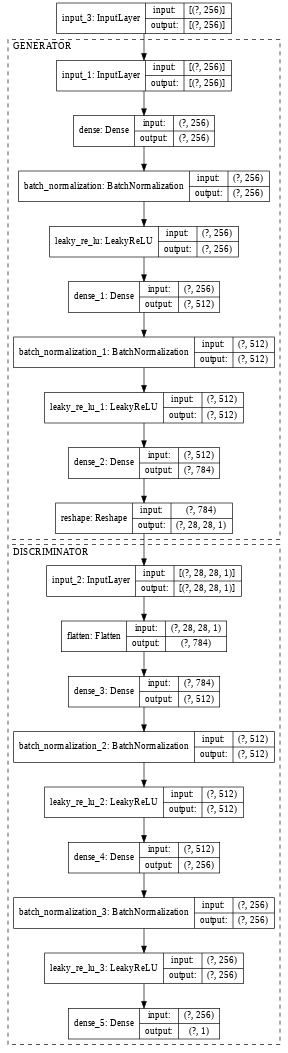

In [0]:
plot_model(gan.combined, show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True, dpi=48)

In [0]:
# Train GAN
d_loss, d_accu, g_loss, g_accu = gan.train(X_train, epochs=5001, batch_size=10000, save_epoch=100)

Training with 10000 samples.
For 5001 epochs at batch_size=10000.
  0 [D loss: 0.8198, acc.: 49.22%] [G loss: 0.6694, acc.: 59.76%]
100 [D loss: 0.5578, acc.: 53.36%] [G loss: 0.5485, acc.: 71.63%]
200 [D loss: 0.4308, acc.: 62.92%] [G loss: 0.6682, acc.: 57.33%]
300 [D loss: 0.4029, acc.: 70.26%] [G loss: 0.7302, acc.: 48.31%]
400 [D loss: 0.3722, acc.: 76.12%] [G loss: 0.7773, acc.: 40.13%]
500 [D loss: 0.3156, acc.: 89.33%] [G loss: 0.9035, acc.: 30.32%]
600 [D loss: 0.3048, acc.: 89.77%] [G loss: 0.9383, acc.: 27.38%]
700 [D loss: 0.2823, acc.: 93.96%] [G loss: 0.9863, acc.: 21.27%]
800 [D loss: 0.2666, acc.: 94.58%] [G loss: 1.0371, acc.: 17.23%]
900 [D loss: 0.2513, acc.: 95.70%] [G loss: 1.0959, acc.: 13.90%]
1000 [D loss: 0.2552, acc.: 94.41%] [G loss: 1.1163, acc.: 20.39%]
1100 [D loss: 0.2340, acc.: 96.94%] [G loss: 1.1691, acc.: 14.81%]
1200 [D loss: 0.2188, acc.: 98.30%] [G loss: 1.2203, acc.: 13.96%]
1300 [D loss: 0.2014, acc.: 99.16%] [G loss: 1.3233, acc.: 16.56%]
1400 [

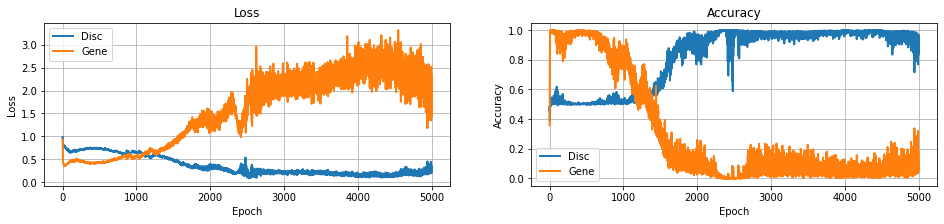

In [0]:
# Plot loss
plt.figure(figsize=(16, 3))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(d_loss, label='Disc', linewidth=2)
plt.plot(g_loss, label='Gene', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(d_accu, label='Disc', linewidth=2)
plt.plot(g_accu, label='Gene', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.show()

In [0]:
# Generate GIF and save it
from PIL import Image
IMGS = []
for ind_img in range(0, 5001, 100):
  IMGS.append(Image.open("out_images/%d.png" % ind_img))

IMGS[0].save('evolution.gif', format='GIF', append_images=IMGS[1:], save_all=True, duration=300, loop=0)

In [0]:
!rm out_images/*

In [0]:
!zip -r /content/images.zip /content/out_images

In [0]:
# Otros intentos

In [0]:
# Define GAN - Itera sobre batches
class GAN(object):
  def __init__(self, n_rows=28, n_cols=28, n_chan=1, latent_len=256):
    '''Class constructor'''
    # Variables
    self.n_rows = n_rows
    self.n_cols = n_cols
    self.n_chan = n_chan
    self.img_shape = (self.n_rows, self.n_cols, self.n_chan)
    self.latent_len = latent_len
    self.generator = self.build_generator()
    self.discriminator = self.build_discriminator()
    self.combined = self.build_combined()
    print(self.generator.summary())
    print(self.discriminator.summary())
    print(self.combined.summary())

  def build_generator(self):
    '''Generator'''
    model = Sequential(name='GENERATOR')
    model.add(Input(shape=(self.latent_len,)))
    model.add(Dense(256))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1024))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(np.prod(self.img_shape), activation='sigmoid'))
    model.add(Reshape(self.img_shape))
    return model

  def build_discriminator(self):
    '''Discriminator'''
    model = Sequential(name='DISCRIMINATOR')
    model.add(Input(shape=self.img_shape))
    model.add(Flatten())
    model.add(Dense(1024))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.2))
    model.add(Dense(512))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.2))
    model.add(Dense(256))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

  def build_combined(self):
    '''Combine generator and discriminator'''
    self.discriminator.trainable = False
    z = Input(shape=(self.latent_len,))
    fake_img = self.generator(z)
    y_hat = self.discriminator(fake_img)
    model = Model(z, y_hat, name='FULLGAN')
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

  def train(self, X_train, epochs=10000, batch_size=100, save_epoch=100):
    '''Train function'''
    # Num of batches
    n_batches = X_train.shape[0] // batch_size
    print(f"Training with {len(X_train)} samples.")
    print(f"For {epochs} epochs at batch_size={batch_size}, thus {n_batches} batches.")

    ## Create vector of 1s and 0s for labels
    y_R = np.ones((batch_size, 1)) # R for real
    y_F = np.zeros((batch_size, 1))# F for fake

    # Create random test noise for further testing
    test_noise = np.random.normal(0, 1, (25, self.latent_len))

    d_loss = []
    d_accu = []
    g_loss = []
    g_accu = []
    for epoch in range(epochs):
      for batch in range(n_batches):
        # Get a random subset of real images
        X_batch = X_train[np.random.randint(low=0, high=X_train.shape[0], size=batch_size)]

        # Generate random-noise samples and predict fake data
        rand_noise = np.random.normal(0, 1, (batch_size, self.latent_len))
        F_batch = self.generator.predict(rand_noise)

        # Train discriminator
        '''
        print("When training Dis:")
        HIST_WD = self.discriminator.get_weights()[0].copy()
        HIST_WG = self.generator.get_weights()[0].copy()
        '''
        d_hist_real = self.discriminator.train_on_batch(X_batch, y_R)
        d_hist_fake = self.discriminator.train_on_batch(F_batch, y_F)
        d_loss.append(0.5 * np.add(d_hist_real[0], d_hist_fake[0]))
        d_accu.append(0.5 * np.add(d_hist_real[1], d_hist_fake[1]))
        '''
        g = np.round((HIST_WG == self.generator.get_weights()[0]).sum() / np.product(HIST_WG.shape))
        if g == 1:
          print("Gen NO cambia")
        if g == 0:
          print("Gen SI cambia")
        d = np.round((HIST_WD == self.discriminator.get_weights()[0]).sum() / np.product(HIST_WD.shape))
        if d == 1:
          print("Dis NO cambia")
        if d == 0:
          print("Dis SI cambia")
        break
        '''
        
        # Train generator
        '''
        print("When training Gen:")
        HIST_WD = self.discriminator.get_weights()[0].copy()
        HIST_WG = self.generator.get_weights()[0].copy()
        '''
        g_hist = self.combined.train_on_batch(rand_noise, y_R)
        g_loss.append(g_hist[0])
        g_accu.append(g_hist[1])
        '''
        g = np.round((HIST_WG == self.generator.get_weights()[0]).sum() / np.product(HIST_WG.shape))
        if g == 1:
          print("Gen NO cambia")
        if g == 0:
          print("Gen SI cambia")
        d = np.round((HIST_WD == self.discriminator.get_weights()[0]).sum() / np.product(HIST_WD.shape))
        if d == 1:
          print("Dis NO cambia")
        if d == 0:
          print("Dis SI cambia")
        '''

      # Print out some info, and save visual evidence
      if epoch % save_epoch == 0:
        print("%6d [D loss: %6.4f, acc.: %6.2f%%] [G loss: %6.4f, acc.: %6.2f%%]" % (epoch, d_loss[-1], 100 * d_accu[-1], g_loss[-1], 100 * g_accu[-1]))
        self.sample_images(epoch, test_noise)
    return d_loss, d_accu, g_loss, g_accu

  def sample_images(self, epoch, test_noise):
    '''Function to visualiza some generated images'''
    test_imgs = self.generator.predict(test_noise)
    fig, axs = plt.subplots(5, 5)
    ind = 0
    for i in range(5):
      for j in range(5):
        axs[i, j].imshow(test_imgs[ind, :, :, 0], cmap='gray')
        axs[i, j].axis('off')
        ind += 1
    fig.savefig("out_images/%d.png" % epoch)
    plt.close()

In [0]:
# Define GAN · Itera sobre batches y combina R con F para entrenadr disc
class GAN(object):
  def __init__(self, n_rows=28, n_cols=28, n_chan=1, latent_len=256):
    '''Class constructor'''
    # Variables
    self.n_rows = n_rows
    self.n_cols = n_cols
    self.n_chan = n_chan
    self.img_shape = (self.n_rows, self.n_cols, self.n_chan)
    self.latent_len = latent_len
    self.generator = self.build_generator()
    self.discriminator = self.build_discriminator()
    self.combined = self.build_combined()
    print(self.generator.summary())
    print(self.discriminator.summary())
    print(self.combined.summary())

  def build_generator(self):
    '''Generator'''
    model = Sequential(name='GENERATOR')
    model.add(Input(shape=(self.latent_len,)))
    model.add(Dense(256))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1024))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(np.prod(self.img_shape), activation='sigmoid'))
    model.add(Reshape(self.img_shape))
    return model

  def build_discriminator(self):
    '''Discriminator'''
    model = Sequential(name='DISCRIMINATOR')
    model.add(Input(shape=self.img_shape))
    model.add(Flatten())
    model.add(Dense(1024))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.2))
    model.add(Dense(512))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.2))
    model.add(Dense(256))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

  def build_combined(self):
    '''Combine generator and discriminator'''
    self.discriminator.trainable = False
    z = Input(shape=(self.latent_len,))
    fake_img = self.generator(z)
    y_hat = self.discriminator(fake_img)
    model = Model(z, y_hat, name='FULLGAN')
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

  def train(self, X_train, epochs=10000, batch_size=100, save_epoch=100):
    '''Train function'''
    # Num of batches
    n_batches = X_train.shape[0] // batch_size
    print(f"Training with {len(X_train)} samples.")
    print(f"For {epochs} epochs at batch_size={batch_size}, thus {n_batches} batches.")

    ## Create vector of 1s and 0s for labels
    y_R = np.ones((batch_size, 1)) # R for real
    y_F = np.zeros((batch_size, 1))# F for fake

    # Create random test noise for further testing
    test_noise = np.random.normal(0, 1, (25, self.latent_len))

    d_loss = []
    d_accu = []
    g_loss = []
    g_accu = []
    for epoch in range(epochs):
      for batch in range(n_batches):
        # Get a random subset of real images
        X_batch = X_train[np.random.randint(low=0, high=X_train.shape[0], size=batch_size)]

        # Generate random-noise samples and predict fake data
        rand_noise = np.random.uniform(0, 1, (batch_size, self.latent_len))
        F_batch = self.generator.predict(rand_noise)

        # Put real and fake data together into a batch
        x = np.concatenate((X_batch, F_batch))
        x = np.random.permutation(x)
        y = np.concatenate((y_R, y_F))
        y = np.random.permutation(y)

        # Train generator
        '''
        print("When training Gen:")
        HIST_WD = self.discriminator.get_weights()[0].copy()
        HIST_WG = self.generator.get_weights()[0].copy()
        '''
        g_hist = self.combined.train_on_batch(rand_noise, y_R)
        g_loss.append(g_hist[0])
        g_accu.append(g_hist[1])
        '''
        g = np.round((HIST_WG == self.generator.get_weights()[0]).sum() / np.product(HIST_WG.shape))
        if g == 1:
          print("Gen NO cambia")
        if g == 0:
          print("Gen SI cambia")
        d = np.round((HIST_WD == self.discriminator.get_weights()[0]).sum() / np.product(HIST_WD.shape))
        if d == 1:
          print("Dis NO cambia")
        if d == 0:
          print("Dis SI cambia")
        '''

        # Train discriminator
        '''
        print("When training Dis:")
        HIST_WD = self.discriminator.get_weights()[0].copy()
        HIST_WG = self.generator.get_weights()[0].copy()
        '''
        d_hist = self.discriminator.train_on_batch(x, y)
        d_loss.append(d_hist[0])
        d_accu.append(d_hist[1])
        #d_hist_real = self.discriminator.train_on_batch(X_batch, y_R)
        #d_hist_fake = self.discriminator.train_on_batch(F_batch, y_F)
        #d_loss.append(0.5 * np.add(d_hist_real[0], d_hist_fake[0]))
        #d_accu.append(0.5 * np.add(d_hist_real[1], d_hist_fake[1]))
        '''
        g = np.round((HIST_WG == self.generator.get_weights()[0]).sum() / np.product(HIST_WG.shape))
        if g == 1:
          print("Gen NO cambia")
        if g == 0:
          print("Gen SI cambia")
        d = np.round((HIST_WD == self.discriminator.get_weights()[0]).sum() / np.product(HIST_WD.shape))
        if d == 1:
          print("Dis NO cambia")
        if d == 0:
          print("Dis SI cambia")
        break
        '''


      # Print out some info, and save visual evidence
      if epoch % save_epoch == 0:
        print("%6d [D loss: %6.4f, acc.: %6.2f%%] [G loss: %6.4f, acc.: %6.2f%%]" % (epoch, d_loss[-1], 100 * d_accu[-1], g_loss[-1], 100 * g_accu[-1]))
        self.sample_images(epoch, test_noise)
    return d_loss, d_accu, g_loss, g_accu

  def sample_images(self, epoch, test_noise):
    '''Function to visualiza some generated images'''
    test_imgs = self.generator.predict(test_noise)
    fig, axs = plt.subplots(5, 5)
    ind = 0
    for i in range(5):
      for j in range(5):
        axs[i, j].imshow(test_imgs[ind, :, :, 0], cmap='gray')
        axs[i, j].axis('off')
        ind += 1
    fig.savefig("out_images/%d.png" % epoch)
    plt.close()
    

# Empieza lo nuevo

In [0]:
df = pd.read_csv("/Flickr8k_text/Flickr8k.token.txt", sep='\t', names=['ID', 'Text'], index_col=False)
print(df.shape)
 
# Remueve entries with nan values
df.dropna(inplace=True)
df.isnull().values.any()
df

In [0]:
found_y = []
new_names = []
found_n = []
for index, row in df.iterrows():
    try:
        #img = load_image(row['ID'][:-2])
        new_name_str = row['ID'][:-6] + '_' + row['ID'][-1] + '.jpg'
        new_names.append(new_name_str)
        #imsave('drive/My Drive/Colab Notebooks/Proyecto final DL/Normalized_images/' + new_name, img)
        found_y.append(row['ID'])
    except:
        found_n.append(row['ID'])

In [0]:
import pandas as pd
import os
allimage = os.listdir('Normalized_images/')
data1 = df.rename(columns={'ID_new': 'image', 'Text': 'caption'})
data = data1[['image','caption']]
data.image = data.image.apply( lambda x: x.split('jpg')[0]+'jpg' )
data['avail'] = data.image.apply( lambda x: x in allimage )
data = data[ data.avail==True ]
data = data.dropna()
print(data.shape)
data.head()

In [0]:
import gc
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import defaultdict
 
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
word_counter = defaultdict(int)
 
table = str.maketrans('', '', string.punctuation,)
def preprocesCaption( caption):
  caption = caption.lower() #to lower case
  caption = caption.translate(table) #remove punctuations
  caption = caption.split() # convert to words
  caption = [ w for w in caption if len(w) > 1 ] #remove dangling 'a' and 's'
  caption = [ w for w in caption if w.isalpha()  ] #keep only words with alphabets
  caption = [ lemmatizer.lemmatize(w) for w in caption ]
  for w in caption: word_counter[w]+=1
  return ' '.join(caption)

In [0]:
from tqdm import tqdm
from collections import defaultdict
 
words = set()
words.update( ('<S>','</S>') )
mx = 0
 
images = defaultdict(list)
for img in tqdm(data.image.unique()):
  for comment in data[data.image == img ].caption.values:
    caption = preprocesCaption(comment)
    caption = [ w for w in caption.split() if word_counter[w]>=10 ]  #taking words whose count atleast 10
    words.update( caption )
    mx = max(mx,len(caption)+2)
    images[img].append( '<S> '+" ".join(caption)+' </S>' )
 
print(len(images), len(words),mx)
del data; gc.collect()

In [0]:
import numpy as np
import os
 
ind_to_word={}
word_to_ind = {}
for i,w in enumerate(words):
  ind_to_word[i+1] = w
  word_to_ind[w] = i+1

In [0]:
from keras.preprocessing.sequence import pad_sequences
 
images_caption = defaultdict(list)
MAX_SEQ_LEN = 25
VOCAB_SIZE = len(words)+1
 
for img in images.keys():
  arr = []
  for caption in images[img]:
    arr.append( [ word_to_ind.get(word) for word in caption.split() ] )
  images_caption[img] = arr

In [0]:
embeddings = np.zafile = open(r'C:\d.pkl', 'wb')
pickle.dump(d, afile)
afile.close()eros(shape=(VOCAB_SIZE,50))
with open('glove.6B.50d.txt','r') as glov:
  for line in glov.readlines():
    line = line.split()
    if line[0] in words:
      embeddings[word_to_ind[line[0]]] = list(map(float,line[1:]))
embeddings.shape

In [0]:

import random
data = []
for key in images_caption.keys():
for caption in images_caption[key]:
    data.append( (key, caption) )
random.shuffle(data)
del images_caption; gc.collect()
data[:2]

In [0]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
Xtext, Ximage, ytext = [],[],[]
for image,text in tqdm(data):
    for i in range(1,len(text)):
        in_text, out_text = text[:i], text[i]
        in_text = pad_sequences([in_text],maxlen=MAX_SEQ_LEN,padding='pre').flatten()
        out_text = to_categorical(out_text,num_classes = VOCAB_SIZE)
        Xtext.append(in_text)
        Ximage.append(image)
        ytext.append(out_text)
Xtext  = np.array(Xtext)
Ximage = np.array(Ximage)
ytext  = np.array(ytext)
print(" {} {} {}".format(Xtext.shape,Ximage.shape,ytext.shape))

In [0]:
from sklearn.model_selection import train_test_split
VALIDATION_SPLIT = 0.2
num_rec = int(len(ytext)*VALIDATION_SPLIT)
def split(dt,rec):
  return dt[:rec],dt[rec:]
 
Ttext, Vtext = split(Xtext,num_rec)
Timage, Vimage = split(Ximage,num_rec)
Ty,Vy = split(ytext,num_rec)
del Xtext,Ximage,ytext; gc.collect()
len(Ttext),len(Vtext)

In [0]:
from keras.preprocessing.image import img_to_array, array_to_img, load_img
from keras.applications.vgg19 import preprocess_input
from keras.applications.vgg19 import VGG19
from keras.models import Model
 
IMG_DIM = (224,224,3)
vgg19 = VGG19(weights='imagenet',include_top=True, input_shape=IMG_DIM)
vgg19.layers.pop()
vggModel = Model( vgg19.input,vgg19.layers[-1].output)
imagemap = {}
 
def getImageFeature(path):
  temp = preprocess_input( img_to_array( load_img( os.path.join(path), target_size=IMG_DIM[:2] )) )
  return vggModel.predict(np.expand_dims(temp,axis=0))[0]